<h1 style="
    background: linear-gradient(90deg, #3498db, #9b59b6, #e74c3c);
    background-size: 300% auto;
    color: white;
    padding: 15px;
    border-radius: 8px;
    text-align: center;
    animation: gradient 5s ease infinite;
">Factor Analysis (Place Data)</h1>

<script>
document.currentScript.parentNode.innerHTML += `
<style>
@keyframes gradient {
    0% {background-position: 0%}
    50% {background-position: 100%}
    100% {background-position: 0%}
}
</style>`;
</script>

<div align="center">
  <img src="https://raw.githubusercontent.com/AdittoAhosanKabbo/Dimension_Reduction/main/Factor%20_Analaysis/FA1/Fameme1.png" width="400">
</div>


<h1 style="
    display: inline-block;
    transition: transform 0.5s ease;
    cursor: pointer;
    padding: 15px;
    background: linear-gradient(135deg, #9b59b6, #3498db);
    color: white;
    border-radius: 8px;
" 
onmouseover="this.style.transform='rotateY(20deg) rotateX(10deg)'"
onmouseout="this.style.transform='rotateY(0) rotateX(0)'"
>1.Data Import & Preparation</h1>

<script>
// Add perspective to parent element
document.currentScript.parentNode.style.perspective = '1000px';
</script>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("places_tf.csv")
df.head(2)

,climate,housing,health,crime,trans,educate,arts,recreate,econ,id
0,2.716838,3.792392,2.374748,2.965202,3.605413,3.440437,2.998259,3.147676,3.882695,1
1,2.759668,3.910518,3.219060,2.947434,3.688687,3.387034,3.745387,3.420286,3.638489,2


In [3]:
df.shape

(329, 10)

In [4]:
df.columns

Index(['climate', 'housing', 'health', 'crime', 'trans', 'educate', 'arts',
       'recreate', 'econ', 'id'],
      dtype='object')

In [5]:
df1 = df.drop(columns=['id'])
df1.head(2)

,climate,housing,health,crime,trans,educate,arts,recreate,econ
0,2.716838,3.792392,2.374748,2.965202,3.605413,3.440437,2.998259,3.147676,3.882695
1,2.759668,3.910518,3.219060,2.947434,3.688687,3.387034,3.745387,3.420286,3.638489


In [6]:
df1.shape

(329, 9)

In [7]:
df1.columns

Index(['climate', 'housing', 'health', 'crime', 'trans', 'educate', 'arts',
       'recreate', 'econ'],
      dtype='object')

In [8]:
df1.isnull().sum()

climate     0
housing     0
health      0
crime       0
trans       0
educate     0
arts        0
recreate    0
econ        0
dtype: int64

In [9]:
# Drop rows which contain missing values
df1.dropna(inplace=True)                        #after that we will check again for missing values using isnull().sum()

<div style="border: 2px solid #4CAF50; padding: 15px; border-radius: 10px; background-color: #f9fff9; font-family: Arial, sans-serif;">
  <h3 style="color: #4CAF50;">🔍 Data Cleaning Interpretation</h3>
  <ul>
    <li><strong>ID Column Removed:</strong> The <code>id</code> column was dropped as it was not relevant for the analysis.</li>
    <li><strong>Missing Values:</strong> The dataset was checked for missing or null values, but no such values were found. Hence, no imputation or removal was needed.</li>
  </ul>
</div>


<h1 style="
    display: inline-block;
    transition: transform 0.5s ease;
    cursor: pointer;
    padding: 15px;
    background: linear-gradient(135deg, #9b59b6, #3498db);
    color: white;
    border-radius: 8px;
" 
onmouseover="this.style.transform='rotateY(20deg) rotateX(10deg)'"
onmouseout="this.style.transform='rotateY(0) rotateX(0)'"
>2.Adequacy Test</h1>

<script>
// Add perspective to parent element
document.currentScript.parentNode.style.perspective = '1000px';
</script>

In [10]:
# Install the library if running 1st time
#!pip install factor-analyzer

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
print(calculate_bartlett_sphericity(df1))

(839.4267918709925, 5.995552889693395e-153)


<div style="border: 2px solid #2196F3; padding: 15px; border-radius: 10px; background-color: #f0f8ff; font-family: Arial, sans-serif;">
  <h3 style="color: #2196F3;">🧪 Bartlett’s Test of Sphericity</h3>
  <p>Bartlett’s test is used to determine whether there is any intercorrelation between variables by comparing the observed correlation matrix with an identity matrix.</p>
  
  <ul>
    <li><strong>Null Hypothesis (H₀):</strong> The correlation matrix is an identity matrix (i.e., variables are not correlated).</li>
    <li><strong>Alternative Hypothesis (H₁):</strong> The correlation matrix is not an identity matrix (i.e., variables are intercorrelated).</li>
  </ul>
  
  <p>🧾 <strong>Test Result:</strong> The p-value from Bartlett’s test is <strong>less than 0.5</strong>, indicating that the test is statistically significant.</p>
  <p>✅ <strong>Conclusion:</strong> We reject the null hypothesis and conclude that the observed correlation matrix is <strong>not</strong> an identity matrix. This implies that there is a significant correlation between the variables.</p>
</div>


In [11]:
# KMO
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df1)
kmo_model

D:\5. softwares\anaconda\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.7029305838189955

<div style="border: 2px solid #2196F3; padding: 15px; border-radius: 10px; background-color: #f0f8ff; font-family: Arial, sans-serif;">
  <h3 style="color: #2196F3;">📊 Kaiser-Meyer-Olkin (KMO) Test for Sampling Adequacy</h3>
  <p>The KMO test helps evaluate whether the sample is suitable for factor analysis by measuring the proportion of variance among variables that might be common variance.</p>
  
  <ul>
    <li><strong>Interpretation Guide:</strong>
      <ul>
        <li>🔹 KMO &lt; 0.5 – Sample is inadequate for factor analysis</li>
        <li>🔹 KMO between 0.5 and 1 – Sample is adequate for factor analysis</li>
      </ul>
    </li>
    <li><strong>Observed KMO Value:</strong> <strong style="color: #2196F3;">0.703</strong></li>
  </ul>
  
  <p>✅ <strong>Conclusion:</strong> The KMO value of <strong>0.703</strong> indicates that the sample is <strong>appropriate</strong> for factor analysis. We can confidently proceed.</p>
 <b> Both Bartlett's Test and KMO indicates that the places dataset is good to go for factor analysis.</b>
</div>


<h1 style="
    display: inline-block;
    transition: transform 0.5s ease;
    cursor: pointer;
    padding: 15px;
    background: linear-gradient(135deg, #9b59b6, #3498db);
    color: white;
    border-radius: 8px;
" 
onmouseover="this.style.transform='rotateY(20deg) rotateX(10deg)'"
onmouseout="this.style.transform='rotateY(0) rotateX(0)'"
>3.Tuning No of factors</h1>

<script>
// Add perspective to parent element
document.currentScript.parentNode.style.perspective = '1000px';
</script>

In [12]:
from factor_analyzer import FactorAnalyzer   # instantiate the Factor Analyzer

fa = FactorAnalyzer() 
fa.fit(df1)                                  # Fit the dataframe using Factor Analyzer
ev, v = fa.get_eigenvalues()                 # Identify the eigenvalues
ev                                           # display the eigenvalues
# Print eigenvalues
print("\nEigenvalues:")
for i, val in enumerate(ev):
    print(f"Factor {i+1}: {val:.3f}")


Eigenvalues:
Factor 1: 3.298
Factor 2: 1.214
Factor 3: 1.106
Factor 4: 0.907
Factor 5: 0.861
Factor 6: 0.562
Factor 7: 0.484
Factor 8: 0.318
Factor 9: 0.251


In [13]:
# Using number of factors with eigenvalue > 1
n_factors = sum(ev > 1)
print(f"\nNumber of factors to use (eigenvalue > 1): {n_factors}")


Number of factors to use (eigenvalue > 1): 3


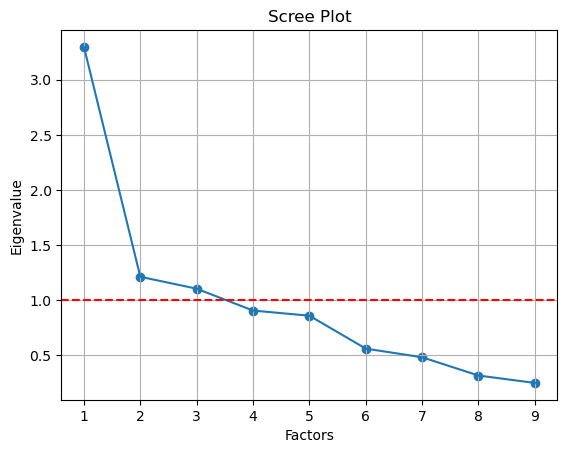

In [14]:
plt.scatter(range(1,10),ev)
plt.plot(range(1,10),ev)                                   ##get value length of col+1
plt.axhline(y=1,color='red', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

<div style="border: 2px solid #2196F3; padding: 15px; border-radius: 10px; background-color: #f0f8ff; font-family: Arial, sans-serif;">
  <h3 style="color: #2196F3;">📉 Eigenvalues & Scree Plot Interpretation</h3>
  <p>Based on the array of eigenvalues and the scree plot, we apply the Kaiser criterion (eigenvalues greater than 1) and visual elbow detection to determine the number of factors to retain.</p>

  <ul>
    <li>🔍 <strong>Observation:</strong> The scree plot shows a noticeable “elbow” after the third component.</li>
    <li>📊 <strong>Eigenvalue Rule:</strong> Only the first three components have eigenvalues &gt; 1.</li>
  </ul>

  <p>✅ <strong>Conclusion:</strong> Based on both the eigenvalues and the scree plot, <strong>three factors</strong> should be retained for the factor analysis.</p>
</div>


<h1 style="
    display: inline-block;
    transition: transform 0.5s ease;
    cursor: pointer;
    padding: 15px;
    background: linear-gradient(135deg, #9b59b6, #3498db);
    color: white;
    border-radius: 8px;
" 
onmouseover="this.style.transform='rotateY(20deg) rotateX(10deg)'"
onmouseout="this.style.transform='rotateY(0) rotateX(0)'"
>4.Getting Factor Loadings</h1>

<script>
// Add perspective to parent element
document.currentScript.parentNode.style.perspective = '1000px';
</script>

In [15]:
fa = FactorAnalyzer(3,rotation=None,method='principal')              ## VVI
fa.fit(df1)                                                          ## here we use principal method,no rotation
fa.loadings_

array([[ 0.28681879,  0.07560335,  0.84084849],
       [ 0.69807335,  0.15335494,  0.08371209],
       [ 0.74438876, -0.40959477, -0.02047721],
       [ 0.47052419,  0.52231278,  0.13507581],
       [ 0.68079195, -0.15586396, -0.14832509],
       [ 0.49817012, -0.49832262, -0.25345619],
       [ 0.86049803, -0.11502014,  0.0115935 ],
       [ 0.64178963,  0.32160899,  0.0439675 ],
       [ 0.29784558,  0.5953728 , -0.53340722]])

In [16]:
lmatrix = pd.DataFrame(fa.loadings_, 
                       index = list(df1.columns), 
                       columns = ['Factor 1', 'Factor 2', 'Factor 3'])
lmatrix #loading matrix    

#lmatrix.style.background_gradient("Blues")

,Factor 1,Factor 2,Factor 3
climate,0.286819,0.075603,0.840848
housing,0.698073,0.153355,0.083712
health,0.744389,-0.409595,-0.020477
crime,0.470524,0.522313,0.135076
trans,0.680792,-0.155864,-0.148325
educate,0.498170,-0.498323,-0.253456
arts,0.860498,-0.115020,0.011593
recreate,0.641790,0.321609,0.043967
econ,0.297846,0.595373,-0.533407


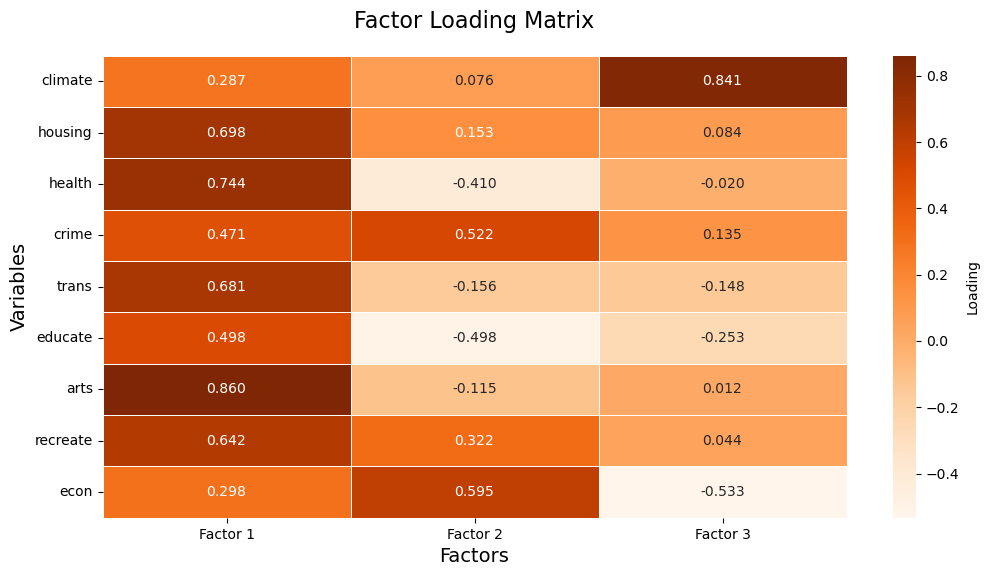

In [17]:
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(
    lmatrix,
    cmap='Oranges',  # Similar color scheme
    annot=True,       # Show values in cells
    fmt=".3f",        # Format to 3 decimal places
    linewidths=.5,    # Add grid lines
    cbar_kws={'label': 'Loading'}  # Colorbar label
)

plt.title("Factor Loading Matrix", fontsize=16, pad=20)
plt.xlabel("Factors", fontsize=14)
plt.ylabel("Variables", fontsize=14)
plt.show()

<div style="border: 2px solid #2196F3; padding: 15px; border-radius: 10px; background-color: #f0f8ff; font-family: Arial, sans-serif;">
  <h3 style="color: #2196F3;">🧾 Factor Naming Based on Loading Matrix / Heatmap</h3>
  <p>After analyzing the factor loading matrix (or its heatmap), we interpret the underlying dimensions by grouping variables that load strongly onto the same factor.</p>
  
  <ul>
    <li><strong>🟦 Factor 1 – Quality of Life:</strong> Includes variables such as <code>housing</code>, <code>health</code>, <code>trans</code>, <code>arts</code>, and <code>recreate</code>.</li>
    <li><strong>🟦 Factor 2 – Socioeconomic:</strong> Defined by variables like <code>crime</code>, <code>educate</code>, and <code>econ</code>.</li>
    <li><strong>🟦 Factor 3 – Climate:</strong> Dominated by the variable <code>climate</code>.</li>
  </ul>

  <p>✅ <strong>Conclusion:</strong> The three extracted factors are clearly interpretable and meaningfully represent distinct dimensions of the dataset.</p>
</div>


<h1 style="
    display: inline-block;
    transition: transform 0.5s ease;
    cursor: pointer;
    padding: 15px;
    background: linear-gradient(135deg, #9b59b6, #3498db);
    color: white;
    border-radius: 8px;
" 
onmouseover="this.style.transform='rotateY(20deg) rotateX(10deg)'"
onmouseout="this.style.transform='rotateY(0) rotateX(0)'"
>5.Get Communality and Variance of factors</h1>

<script>
// Add perspective to parent element
document.currentScript.parentNode.style.perspective = '1000px';
</script>

In [18]:
print("\nCOMMUNALITIES:")
print(pd.DataFrame(fa.get_communalities(), 
                   index=df1.columns, 
                   columns=['Communality']).round(3))


COMMUNALITIES:
          Communality
climate         0.795
housing         0.518
health          0.722
crime           0.512
trans           0.510
educate         0.561
arts            0.754
recreate        0.517
econ            0.728


In [19]:
print("\nVARIANCE EXPLAINED BY EACH FACTOR:")
print(pd.DataFrame(fa.get_factor_variance(), 
                  index=['Variance', 'Proportional Var', 'Cumulative Var'],          ## ev=var
                  columns=[f'Factor {i+1}' for i in range(3)]).round(4))


VARIANCE EXPLAINED BY EACH FACTOR:
                  Factor 1  Factor 2  Factor 3
Variance            3.2978    1.2136    1.1055
Proportional Var    0.3664    0.1348    0.1228
Cumulative Var      0.3664    0.5013    0.6241


<div style="border: 2px solid #2196F3; padding: 15px; border-radius: 10px; background-color: #f0f8ff; font-family: Arial, sans-serif;">
  <h3 style="color: #2196F3;">📈 Communalities & Total Variance Explained</h3>
  <ul>
    <li>🔍 <strong>Communalities:</strong> Most of the variables have communalities <strong>&gt; 0.5</strong>, which suggests that the extracted factors explain a substantial amount of each variable’s variance. This indicates a good fit for factor analysis.</li>
    <li>📊 <strong>Total Variance Explained:</strong> The three retained factors together explain <strong>62.4%</strong> of the total variance in the dataset.</li>
  </ul>
  
  <p>✅ <strong>Conclusion:</strong> The factor model is effective, as it captures a significant portion of the data’s variance and the variables are well represented by the factors.</p>
</div>


In [20]:
# Get final Factorscores (Latent variables extracted from observed variables)
df2=pd.DataFrame(fa.transform(df1), columns=["Factor 1", "Factor 2", "Factor 3"])     ## VVI (will not work if i dont put df1 in bracket)
print(df2)

     Factor 1  Factor 2  Factor 3
0   -0.661175  1.340406 -0.899494
1    0.517484 -0.225875  1.053410
2   -1.294654  0.308861  0.024176
3    0.760670 -1.467113 -1.195189
4    1.344219  0.174185  0.395227
..        ...       ...       ...
324  0.081125 -1.693754 -0.042462
325 -0.649067  1.004346  0.565966
326 -1.008990 -1.210565  0.179839
327 -0.197286 -1.211804  0.994951
328 -1.603003  1.139483  1.281390

[329 rows x 3 columns]


<div align="center">
  <img src="https://raw.githubusercontent.com/AdittoAhosanKabbo/Dimension_Reduction/main/Factor%20_Analaysis/FA1/fameme2.png" width="400">
</div>

<div style="text-align: center; margin: 5px; perspective: 700px;">
    <h1 id="factorHeadline" 
        style="font-family: 'Montserrat', sans-serif; 
               font-size: 3em; 
               color: #ecf0f1; 
               background: linear-gradient(135deg, #1abc9c, #9b59b6); 
               padding: 25px 40px; 
               border-radius: 15px; 
               box-shadow: 0 10px 20px rgba(0,0,0,0.4); 
               text-shadow: 3px 3px 5px rgba(0,0,0,0.5); 
               transform: rotateX(10deg); 
               transition: transform 0.4s ease, background 0.4s ease, color 0.4s ease; 
               animation: pulseGlow 2s infinite ease-in-out; 
               display: inline-block; 
               cursor: pointer; 
               position: relative; 
               overflow: hidden;"
        onclick="this.style.background = this.style.background === 'linear-gradient(135deg, rgb(231, 76, 60), rgb(241, 196, 15))' ? 
                 'linear-gradient(135deg, #1abc9c, #9b59b6)' : 
                 'linear-gradient(135deg, #e74c3c, #f1c40f)';
                 this.style.color = this.style.color === 'rgb(52, 73, 94)' ? '#ecf0f1' : '#34495e';
                 this.style.transform = this.style.transform === 'rotateX(10deg) rotateY(10deg)' ? 
                 'rotateX(10deg)' : 'rotateX(10deg) rotateY(10deg)';">
        THE END
    </h1>
</div>



<div style="text-align: center; font-family: Arial; color: #666; border-top: 1px solid #ddd; padding-top: 10px;">
<b>Aditto ahosan Kabbo</b><br>
<a href="mailto:aditahosankabbo@gmail.com" style="color: #0066cc; text-decoration: none;">📧 aditahosankabbo@gmail.com</a> | 
<a href="https://www.linkedin.com/in/adittoahosankabbo/" style="color: #0066cc; text-decoration: none;">🔗 LinkedIn</a> | 
<a href="https://github.com/AdittoAhosanKabbo" style="color: #0066cc; text-decoration: none;">🐱 GitHub</a><br>
<small>Notebook • Last Updated: 2025-05-18 • © 2025</small>
</div>